In [2]:
library(tidyverse)
options(repr.plot.width = 8 , repr.plot.height = 5, jupyter.plot_mimetypes = "image/svg+xml")
theme_set(theme_classic())

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# STATS 504
## Week 2
![babies](https://images.ctfassets.net/cnu0m8re1exe/PYLeBWr2QDF5yjyZwB5Iq/7509e49d1d621860c1d4c484243c23db/shutterstock_189429203.jpg)

The US Social Security Administration keeps records of every child born in the United States each year. These records are available in aggregate form in a [public database](https://www.ssa.gov/oact/babynames/).

In [6]:
# install.packages("babynames")
library(babynames)

babynames %>% print

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# A tibble: 1,924,665 × 5
    year sex   name          n   prop
   <dbl> <chr> <chr>     <int>  <dbl>
 1  1880 F     Mary       7065 0.0724
 2  1880 F     Anna       2604 0.0267
 3  1880 F     Emma       2003 0.0205
 4  1880 F     Elizabeth  1939 0.0199
 5  1880 F     Minnie     1746 0.0179
 6  1880 F     Margaret   1578 0.0162
 7  1880 F     Ida        1472 0.0151
 8  1880 F     Alice      1414 0.0145
 9  1880 F     Bertha     1320 0.0135
10  1880 F     Sarah      1288 0.0132
# ℹ 1,924,655 more rows


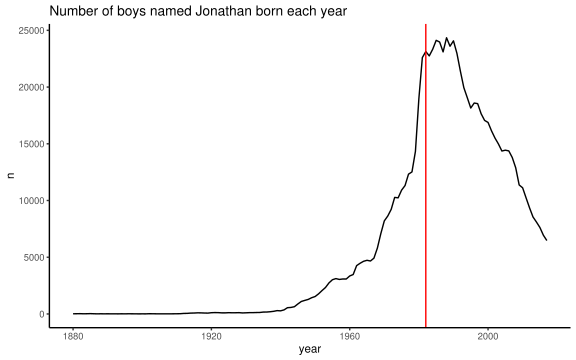

In [ ]:
# Plot my name over time

<img src="https://beam-images.warnermediacdn.com/BEAM_LWM_DELIVERABLES/52dae4c7-2ab1-4bb9-ab1c-8100fd54e2f9/525e19cadd275c68e933773cc3bdad91a12fe10e.jpg?submitted=1684658977805&host=wbd-images.prod-vod.h264.io&partner=beamcom">

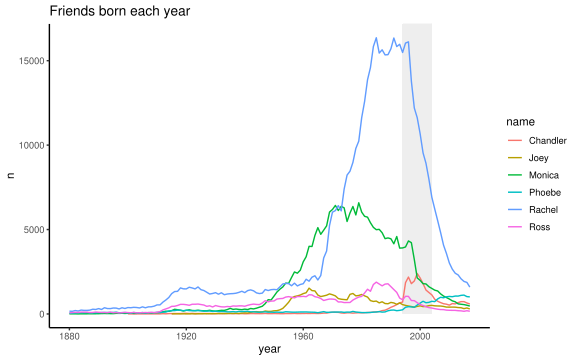

In [ ]:
# friends over time

## Eternal names
The most common name each year is:

In [ ]:
group_by(babynames, year, sex) %>% top_n(1) %>% print

Selecting by prop


# A tibble: 276 × 5
# Groups:   year, sex [276]
    year sex   name      n   prop
   <dbl> <chr> <chr> <int>  <dbl>
 1  1880 F     Mary   7065 0.0724
 2  1880 M     John   9655 0.0815
 3  1881 F     Mary   6919 0.0700
 4  1881 M     John   8769 0.0810
 5  1882 F     Mary   8148 0.0704
 6  1882 M     John   9557 0.0783
 7  1883 F     Mary   8012 0.0667
 8  1883 M     John   8894 0.0791
 9  1884 F     Mary   9217 0.0670
10  1884 M     John   9388 0.0765
# … with 266 more rows


We see that Mary and John were extremely popular names in the late 19th century.

## &#129300; Quiz

Call a name *eternal* if it is among the most 30 common names for its gender in *every* year of data.

John is eternal, but Mary is not. Including John there are four eternal boy names, and one eternal girl name.

What is the eternal girl's name?

<ol style="list-style-type: upper-alpha;">
    <li>Anna</li>
    <li>Elizabeth</li>
    <li>Khloe</li>
    <li>Spike</li>
    <li>Margaret</li>
</ol>

In [ ]:
# the eternal names

name,sex,n
<chr>,<chr>,<int>
Elizabeth,F,138
James,M,138
John,M,138
Joseph,M,138
William,M,138
David,M,129
Robert,M,122
Thomas,M,117
Richard,M,106


## Naming trends driven by migration
What fraction of male names ended in "o", or female names in "a", over time?

In [ ]:
# What fraction of male names ended in o, or female names in a, over time?

## First letter
Does the first letter of a name show evidence of trends in popularity over time?

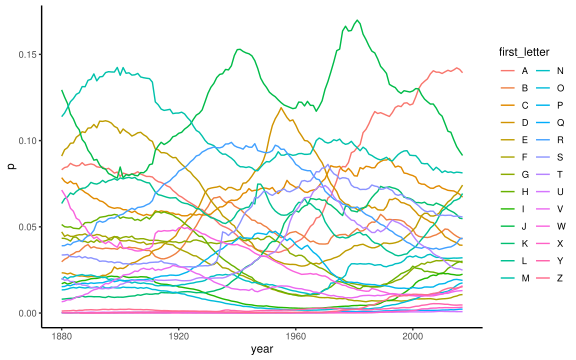

In [ ]:
# first letter over time

In [ ]:
# organized by decade

`summarise()` has grouped output by 'decade'. You can override using the `.groups` argument.


decade,first_letter,n
<fct>,<chr>,<int>
1880-1889,M,302499
1890-1899,M,465711
1900-1909,M,591938
1910-1919,M,1768309
1920-1929,J,2562931
1930-1939,J,2930203
1940-1949,J,4277133
1950-1959,J,4862016
1960-1969,J,4531308


## Naming diversity
Has the variety of names increased over time? How can we measure this?

- Number of unique names/year
- Inequality measure (Gini coefficient)
- Entropy

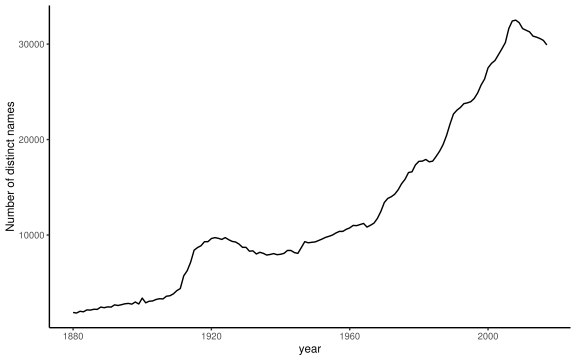

In [ ]:
# distinct names over time

## Entropy
The entropy of a (discrete) probability distribution is:

$$H = -\sum_i p_i \log p_i$$

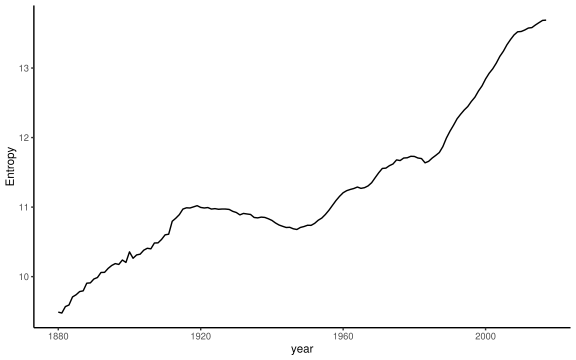

In [ ]:
# entropy over time

## Gini's coefficient

Gini's coefficient is another measure of inequality in a distribution. It is defined as:

$$G = \frac{\sum_{i,j} |x_i - x_j|}{2 \bar{x} n^2}$$



Assuming $x_i\ge 0$:

- $G=0$: perfect equality.
- $G=1$: "perfect inequality": one person has everything, everyone else has nothing.
- $G \ge 0$: obvious.
- $G \le 1$: obvious?

In [ ]:
gini <- function(xs) {
    n <- length(xs)
    D <- dist(xs)
    sum(dist(xs)) / n / n / mean(xs)
}

gini(c(1,1,123))

[1] 0.6506667

In [ ]:
# install.packages('dineq')
library(dineq)
gini.wtd(c(1,1,123))

[1] 0.6506667

In [ ]:
# gini coefficient over time

## Age vs. name
Can you accurately predict someone's age based on their name? How should we approach this question?

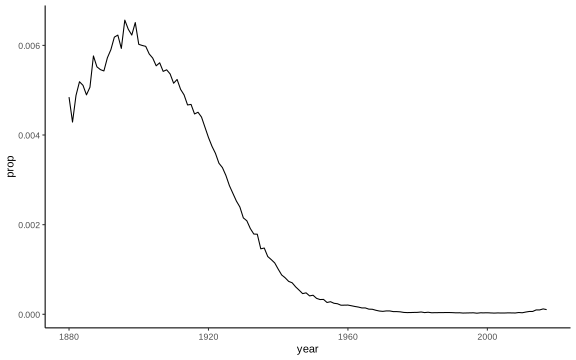

In [28]:
# proportion of babies named Agnes over time
babynames %>%
  filter(name == "Agnes", sex == "F") %>%
  ggplot(aes(x = year, y=prop)) + geom_line()

## Bayesian model

\begin{gather}
\mathbb{P}(\text{age}=a\mid\text{name})=\mathbb{P}(\text{birth year}=2024-a\mid\text{name})
\\=\mathbb{P}(\text{name}\mid\text{birth year}=2024-a)\frac{\mathbb{P}(\text{birth year}=2024-a)}{\mathbb{P}(\text{name})} \\
\propto  \mathbb{P}(\text{name}\mid\text{birth year}=2024-a)\mathbb{P}(\text{birth year}=2024-a)
\end{gather}

What are the quantities we would need to estimate?
- $\mathbb{P}(\text{age}=a\mid\text{name})=\mathbb{P}(\text{birth year}=2024-a\mid\text{name})$:  ✅
- $\mathbb{P}(\text{birth year}=2024-a)$: the age distribution of the current population.

## Age distribution of the current population
- The US Census has this information [readily available](https://www.census.gov/popclock/data_tables.php?component=pyramid).
- (I downloaded the table by hand since their website makes it hard to automate.)

In [19]:
read_csv('United States Population by Age and Sex.csv', skip=1) %>% #skip = 1, not looking at the first row of data
    mutate(across(1:3, \(x) str_replace_all(x, "[^\\d.]", "") %>% as.numeric)) %>%
    slice(1:101) -> ages_structure #slice since we are only interested in the 2022 data

#last row is 100+, cannot convert to int directly, use regular expression, across: to do it for all 3 columns, replace non decimal with nothing
ages_structure %>% mutate(birth_year = 2024 - Age) %>%
  head
babynames %>% head

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 307 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Age, Male % of Population, Female % of Population

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Male % of Population,Female % of Population,birth_year
<dbl>,<dbl>,<dbl>,<dbl>
0,0.56,0.54,2024
1,0.55,0.53,2023
2,0.57,0.54,2022
3,0.57,0.55,2021
4,0.59,0.56,2020
5,0.60,0.57,2019


year,sex,name,n,prop
<dbl>,<chr>,<chr>,<int>,<dbl>
1880,F,Mary,7065,0.07238359
1880,F,Anna,2604,0.02667896
1880,F,Emma,2003,0.02052149
1880,F,Elizabeth,1939,0.01986579
1880,F,Minnie,1746,0.01788843
1880,F,Margaret,1578,0.01616720


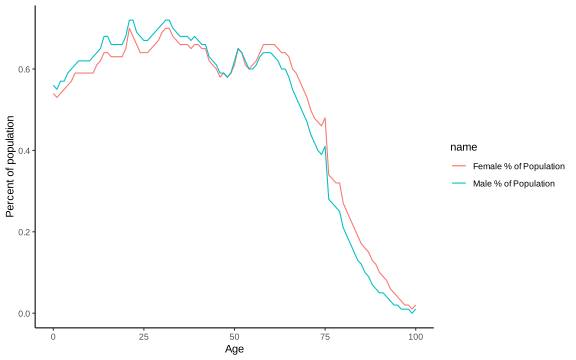

In [20]:
ages_structure %>%
    pivot_longer(cols=2:3, values_to = "Percent of population") %>% #put babynames and age_structure together
    ggplot(aes(x=Age, y=`Percent of population`, color=name)) +
    geom_line()

## Putting it together

Warning message:
“Removed 5 rows containing missing values (`geom_line()`).”


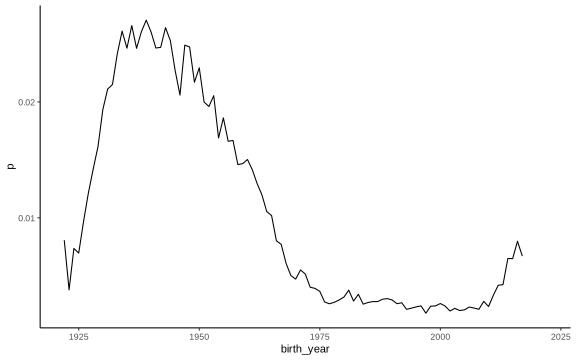

In [24]:
ages_structure %>% mutate(birth_year = 2022 - Age) %>%
    select(c(1, 3, 4)) %>%
    left_join(filter(babynames, name == "Agnes", sex == "F"), #focus on Agnes
               by=c("birth_year" = "year")) %>%
    mutate(p = prop * `Female % of Population`, p = p / sum(p, na.rm = T)) %>% #probability of babyname give birth year=prop, fraction of population that name in particular year
    ggplot(aes(x = birth_year, y=p)) + geom_line()

## Name distribution of the current population
- Let's say we didn't know Bayesian statistics that well, and we decided to estimate $\mathbb{P}(\text{name})$. How might we do it?
- $\mathbb{P}(\text{name})$: the probability that a randomly sampled person from the current population has this name.
- How to estimate this? What sort of data?

\begin{gather}
\mathbb{P}(\text{name})	=\sum_{y}\mathbb{P}(\text{name},\text{survives},\text{birth year}=y)
\\=\sum_{y}\mathbb{P}(\text{survives}\mid\text{birth year}=y)\mathbb{P}(\text{name },\text{birth year}=y)
\end{gather}

How to estimate $$\mathbb{P}(\text{name },\text{birth year}=y)?$$

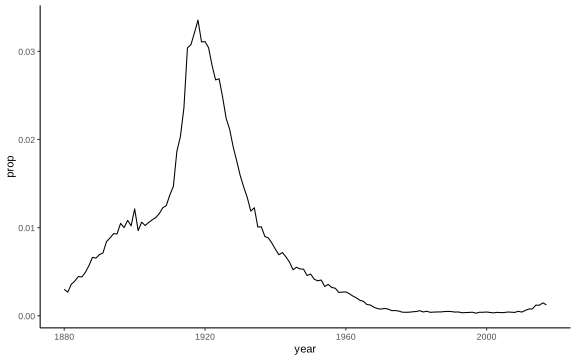

In [29]:
babynames %>% filter(name == "Agnes", sex == "F") %>%
    mutate(prop = n / sum(n)) %>%
    ggplot(aes(x=year, y=prop)) + geom_line()

## Other options
- Supervised learning: build a prediction function $f(\text{name}) \to \text{age}$.
- Two important questions:
    - What sort of data would be needed?
    - What sort of prediction function $f$?


## Getting the data

- The Social Security administration also has individual-level data on births and deaths.
- It is called the [Death Master File](https://en.wikipedia.org/wiki/Death_Master_File).
- It is no longer available to the public.

## Getting the data
- But it used to be.
- The last release (2014) has been archived on [Archive.org](https://archive.org/download/DeathMasterFile).
- Too big to post to the course Github, but you can download these files on your own.

## Professional data scientists: what do you do all day

<img src="https://www.anaconda.com/wp-content/uploads/2023/02/Stacked-Chart.svg" />
Source: https://www.anaconda.com/resources/whitepapers/state-of-data-science-2020

## The raw data
- Let's examine in Unix.
- What is this format?

## Fixed-width file
- Each data field has a fixed width.
- Characters in each column are aligned in fixed positions.
- Common in legacy systems and data transfer.
- Advantages:
  - Easy to parse (fixed column positions).
  - Consistent record lengths.
- Disadvantages:
  - Inefficient space usage.
  - Difficult to read without a format guide.

Example:

    | Name      | Age | City       |
    |-----------|-----|------------|
    | John Doe  | 28  | New York   |
    | Jane Smith| 32  | Los Angeles|


## Layout for `ssdm` files
- Layout is undocumented in the data source.
- I tried Googling and found [this document](https://ladmf.ntis.gov/Help/RecordLayout) which looks correct.

In [ ]:
library(readr)

columns <- c("status", "ssn", "last_name", "name_suffix", "first_name", "middle_name",
             "vp_code", "death_date", "birth_date", "blanks1", "blanks2",
             "blanks3", "blanks4", "blanks5")

layout <- fwf_widths(c(1, 9, 20, 4, 15, 15, 1, 8, 8, 2, 5, 5, 5, 7),
                     col_names = columns)

ssdm <- read_fwf("/mnt/turbo/jonth/datasets/DeathMasterFile/ssdm1", layout, n_max = 1000000)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 1000000 Columns: 14
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────

chr (7): ssn, last_name, first_name, middle_name, vp_code, death_date, birth...
lgl (7): status, name_suffix, blanks1, blanks2, blanks3, blanks4, blanks5

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
## Cleaning the data
library(lubridate)

ssdm %>% select(first_name, last_name, birth_date) %>% mutate(
    death_date = mdy(death_date)
) %>% head

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `death_date = mdy(death_date)`.
Caused by warning:
!  55628 failed to parse.”


status,ssn,last_name,name_suffix,first_name,middle_name,vp_code,death_date,birth_date,blanks1,blanks2,blanks3,blanks4,blanks5
<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
NA,001010001,MUZZEY,NA,GRACE,NA,NA,NA,04161902,NA,NA,NA,NA,NA
NA,001010009,SMITH,NA,ROGER,NA,NA,NA,02041892,NA,NA,NA,NA,NA
NA,001010010,HAMMOND,NA,KENNETH,NA,NA,NA,04241904,NA,NA,NA,NA,NA
NA,001010011,DREW,NA,LEON,R,V,1987-08-30,06141908,NA,NA,NA,NA,NA
NA,001010012,CATE,NA,OLIVE,NA,NA,NA,09211908,NA,NA,NA,NA,NA
NA,001010013,WHORFE,NA,FRANK,NA,NA,NA,04061888,NA,NA,NA,NA,NA


In [30]:
parse_mmddyyyy <- function(date_string) {
  # Replace '00' day with '01'
  date_string <- ifelse (substr(date_string, 3, 4) == "00",
  paste0(substr(date_string, 1, 2), "01", substr(date_string, 5, 8)),
  date_string)
    mdy(date_string)
}

In [ ]:
ssdm %>%
    mutate(
        across(ends_with("date"), (parse_mmddyyyy)),
        age = death_date - birth_date
    ) ->
    ssdm_cleaned
# is giving the function whole column of data, so vectorize the function, it's slow since function using for loop
# rewrite the function using ifelse

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(ends_with("date"), parse_mmddyyyy)`.
Caused by warning:
!  112 failed to parse.”


## Sanity checks
- When you parse messy data like this, it's important to do some basic checks to make sure that nothing went wrong.
- "Basic checks": do the variables have the correct?:
  - Magnitude?
  - Sign?
  - Ordering?


In [ ]:
min(ssdm_cleaned$birth_date, na.rm=T)
# sum(year(ssdm_cleaned$birth_date) == 0, na.rm = T)
# filter(ssdm_cleaned, year(birth_date) == 0)

[1] "0-01-13"

In [ ]:
sum(is.na(ssdm_cleaned$birth_date))

[1] 112

In [ ]:
sum(is.na(ssdm_cleaned$death_date))

[1] 0

In [ ]:
sum(ssdm_cleaned$birth_date > ssdm_cleaned$death_date, na.rm=T)

## Sanity check: Comparing with `babynames`
- `ssdm`, tells us among other things, how many people with each name were born in each year.
- How does it compare to the other data source (produced by same agency) that we have?

In [ ]:
ssdm_cleaned %>% mutate(y = year(birth_date)) %>% select(first_name, y) %>%
    count(y, first_name) %>% filter(y == 1940) %>% top_n(10)

Selecting by n


y,first_name,n
<dbl>,<chr>,<int>
1940,CHARLES,9
1940,DAVID,10
1940,DONALD,12
1940,GEORGE,10
1940,JAMES,10
1940,JOHN,10
1940,RICHARD,21
1940,ROBERT,28
1940,RONALD,9


In [ ]:
library(babynames)
babynames_ns <- babynames %>% group_by(year, name) %>% summarize(n = sum(n))

ssdm_cleaned %>% mutate(year = year(birth_date), name=str_to_title(first_name)) %>%
    select(name, year) %>%
    count(year, name) %>% filter(year == 1940) %>%
    left_join(babynames_ns, join_by(name == name, year == year)) ->
    ss_name_joined

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.


In [ ]:
lm(n.x ~ n.y, ss_name_joined) %>% summary


Call:
lm(formula = n.x ~ n.y, data = ss_name_joined)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6740 -0.5157 -0.0623  0.1510 13.2212 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.265e-01  1.398e-01    6.63 2.47e-10 ***
n.y         2.256e-04  1.198e-05   18.84  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.818 on 225 degrees of freedom
  (28 observations deleted due to missingness)
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6102 
F-statistic: 354.7 on 1 and 225 DF,  p-value: < 2.2e-16


## Predicting based on `ssdn`
- how could we use `ssdn` to improve our predictions?
- I need a big array $N$ such that

$$N[n,x,y] = \text{number of people named $n$, born in $x$, alive in $y$}$$

- This is too big to compute all at once! (Dimensions?)

- Let's see how this works with the name "John".

In [ ]:
filter(ssdm_cleaned, first_name == "JOHN") %>%
    drop_na(ends_with("date")) %>%
    rowwise() %>%
    mutate(lifespan = list(year(birth_date):year(death_date))) %>%
    unnest(lifespan) %>%
    mutate(birth_year = year(birth_date)) %>%
    group_by(birth_year, lifespan) %>% summarize(s = n())

ERROR: Error in filter(ssdm_cleaned, first_name == "JOHN"): object 'ssdm_cleaned' not found


In [ ]:
?pivot_wider

If we had loaded the complete data, then the number of John's born in 1940 who were still alive in 2000 would be 54985 minus:

In [ ]:
filter(ssdm_cleaned, first_name == "JOHN",
       year(birth_date) == 1940,
       year(death_date) > 2000) %>%
    nrow

[1] 3

So in general:

In [ ]:
ssdm_cleaned %>%
    drop_na(birth_date, death_date) %>%
    rowwise() %>%
    mutate(year = list(year(birth_date):year(death_date))) %>%
    unnest(year) %>%
    group_by(first_name, year) %>%
    summarise(alive = n(), .groups = 'drop')

first_name,year,alive
<chr>,<int>,<int>
A,1876,1
A,1877,1
A,1878,1
A,1879,2
A,1880,2
A,1881,2
A,1882,2
A,1883,3
A,1884,3


In [ ]:
?coalesce

## Regression
- Start with the simplest technique that you know.

$$\text{age}_i = \alpha_{\text{name}} + \beta_1 \times \text{birth year}_i$$.

## Life expectancy at birth
- Finally we want to estimate $\mathbb{P}(\text{survives}\mid\text{birth year}=y)$.
- Hard(er) to estimate! We will look at the related quantity: $\mathbb{E}(\text{lifespan} \mid \text{birth year}=y)$.
- This is called [*life expectancy at birth*](https://www.statista.com/statistics/1040079/life-expectancy-united-states-all-time/#:~:text=Over%20the%20past%20160%20years,to%2078.9%20years%20in%202020).

In [ ]:
src_url <- "https://docs.google.com/spreadsheet/pub?key=tiAiXcrneZrUnnJ9dBU-PAw&output=xlsx"
download.file(src_url, "life_expectancy.xlsx")

In [ ]:
readxl::read_excel("life_expectancy.xlsx") %>%
    filter(`Life expectancy with projections` == "United States") %>%
    pivot_longer(cols=-1, names_to="year", values_to="lifeexp") %>%
    mutate(across(2:3, as.numeric)) %>%
    drop_na -> us_le

Warning message:
“Removed 103 rows containing missing values (`geom_line()`).”


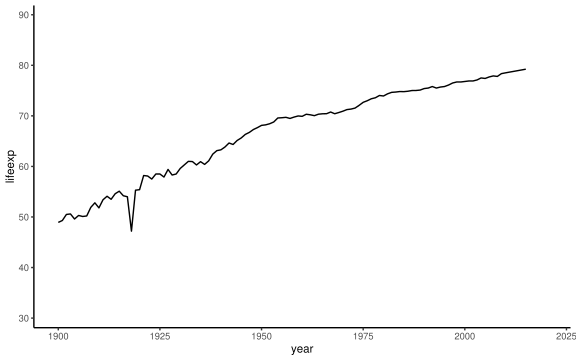

In [ ]:
ggplot(us_le, aes(x=year, y=lifeexp)) + geom_line() + xlim(c(1900, 2020))

Now we are going to make a drastic assumption: everyone's life span is exactly given by their life expectancy at birth. Then,

$$\mathbb{P}(\text{survives} \mid \text{birth year}=y) = \mathbb{1}(\text{life expectancy}_y > 2024 - y)$$

Warning message:
“Removed 102 rows containing missing values (`geom_line()`).”


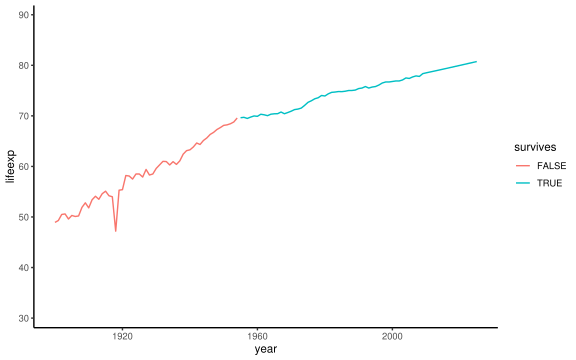

In [ ]:
us_le %>% mutate(survives = lifeexp > 2024 - year) %>%
    ggplot(aes(x=year, y=lifeexp, color=survives)) + geom_line() + xlim(c(1900, 2025))